In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('taxi.csv')
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
## Check Summary Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18919 entries, 0 to 18918
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        18919 non-null  float64
 1   pickup_datetime    18919 non-null  object 
 2   pickup_longitude   18919 non-null  float64
 3   pickup_latitude    18919 non-null  float64
 4   dropoff_longitude  18919 non-null  float64
 5   dropoff_latitude   18919 non-null  float64
 6   passenger_count    18918 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.0+ MB


In [5]:
## Check Missing Value

In [6]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [7]:
### Handling Missing Value

In [8]:
df.dropna(inplace=True)

In [9]:
## Check DataTypes

In [10]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
## Data Types Conversion

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [14]:
## Data describe

In [15]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000,18918.000000
mean,11.289221,-72.486834,39.925272,-72.498734,39.913116,1.657205
std,9.551667,10.503808,6.715228,10.461670,6.160671,1.282236
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992223,40.734687,-73.991233,40.734589,1.000000
50%,8.500000,-73.981758,40.752620,-73.980234,40.753566,1.000000
75%,12.500000,-73.966788,40.767427,-73.963834,40.768067,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [16]:
### Data Preparation

## Adding Features :
- Jarak (Simplify)
- Jam (Jam pulang dan berangkat kantor)
- Hari : Hari kerja atau libur
- Lokasi
- Tahun
- Jumlah penumpang

In [17]:
### Features Extraction => Datetime Extract

In [18]:
pickup_dt = df['pickup_datetime'].dt

In [19]:
df['year'] = pickup_dt.year ## mengambil tahun
df['month'] = pickup_dt.month ## mengambil bulan
df['date'] = pickup_dt.day ## mengambil tanggal

In [20]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9


In [21]:
df['day'] = pickup_dt.dayofweek

In [22]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1


In [23]:
def Weekend(x):
    if x >4:
        return 1
    else:
        return 0

In [24]:
df['WeekEnd'] = df['day'].apply(Weekend)

In [25]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,WeekEnd
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,0


In [26]:
df.drop(columns='pickup_datetime', inplace=True)

In [27]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,WeekEnd
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,0


In [28]:
### Membuat Jarak - Simplify
df['distance'] =abs((df['pickup_longitude'] - df['dropoff_longitude'] + 
                    df['pickup_latitude'] - df['dropoff_latitude']))

In [29]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,WeekEnd,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,0,0.006340
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,0,0.107481
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,0.019212
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,1,0.020512
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,0,0.027194


In [30]:
df.drop(columns=['pickup_longitude', 'dropoff_longitude', 'pickup_latitude', 'dropoff_latitude'], inplace=True)

In [31]:
df.head()

,fare_amount,passenger_count,year,month,date,day,WeekEnd,distance
0,4.5,1.0,2009,6,15,0,0,0.006340
1,16.9,1.0,2010,1,5,1,0,0.107481
2,5.7,2.0,2011,8,18,3,0,0.019212
3,7.7,1.0,2012,4,21,5,1,0.020512
4,5.3,1.0,2010,3,9,1,0,0.027194


In [32]:
### Machine Leraning Modelling

In [33]:
### Spltting Data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns='fare_amount')
y = df['fare_amount']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 42)

In [37]:
X_train.shape

(15134, 7)

In [38]:
X_test.shape

(3784, 7)

In [39]:
X_train.head()

,passenger_count,year,month,date,day,WeekEnd,distance
7539,1.0,2011,6,14,1,0,0.000000
578,3.0,2010,3,25,3,0,0.009293
8056,5.0,2010,4,12,0,0,0.048951
11761,1.0,2014,11,17,0,0,0.021735
15531,1.0,2012,12,29,5,1,0.010498


In [40]:
X_test.head()

,passenger_count,year,month,date,day,WeekEnd,distance
12565,1.0,2012,6,15,4,0,0.034270
5282,1.0,2012,1,19,3,0,0.013032
4525,2.0,2010,11,16,1,0,0.058549
17370,2.0,2011,2,9,2,0,0.069345
9239,1.0,2013,10,7,0,0,0.013675


In [41]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
## Base Model

In [44]:
Model_1 = LinearRegression(fit_intercept=False)

In [45]:
Model_1.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [46]:
### Evaluation

In [47]:
### Training

In [48]:
y_pred_tr = Model_1.predict(X_train)

In [49]:
r2_score(y_train, y_pred_tr)

0.001311695445722294

In [50]:
mean_absolute_error(y_train, y_pred_tr)

6.015018423617383

In [51]:
mean_squared_error(y_train, y_pred_tr)

92.61007840958622

In [52]:
np.sqrt(mean_squared_error(y_train, y_pred_tr))

9.623413033305088

In [53]:
### Testing

In [54]:
y_pred_ts = Model_1.predict(X_test)

In [55]:
r2_score(y_test, y_pred_ts)

0.0027377484669761643

In [56]:
mean_absolute_error(y_test, y_pred_ts)

5.806390978693588

In [57]:
mean_squared_error(y_test, y_pred_ts)

84.96535334312449

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred_ts))

9.217665286997814

In [59]:
def Eva_Matrix(Model,X, y_true):
    y_pred = Model.predict(X)
    R2 = r2_score(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    return R2, MAE, MSE, RMSE

In [60]:
r2_train, MAE_train, MSE_train, RMSE_train = Eva_Matrix(Model_1, X_train, y_train)

In [61]:
r2_train

0.001311695445722294

In [62]:
r2_test, MAE_test, MSE_test, RMSE_test = Eva_Matrix(Model_1, X_test, y_test)

In [63]:
r2_test

0.0027377484669761643

In [64]:
data = {
    'Training' : [r2_train, MAE_train, MSE_train, RMSE_train],
    'Testing' : [r2_test, MAE_test, MSE_test, RMSE_test]
}

In [65]:
pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,0.001312,0.002738
MAE,6.015018,5.806391
MSE,92.610078,84.965353
RMSE,9.623413,9.217665


In [66]:
def Eva_Matrix_DF(Model,X_train, X_test, y_train, y_test, Nama):
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        'Training' + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        'Testing' + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

In [67]:
df_LinReg = Eva_Matrix_DF(Model_1, X_train, X_test, y_train, y_test, 'LinReg')

In [68]:
df_LinReg

,TrainingLinReg,TestingLinReg
R2,0.001312,0.002738
MAE,6.015018,5.806391
MSE,92.610078,84.965353
RMSE,9.623413,9.217665


In [69]:
Model_2 = Lasso()

In [70]:
Model_2.fit(X_train, y_train)

Lasso()

In [71]:
df_Lasso = Eva_Matrix_DF(Model_2, X_train, X_test, y_train, y_test, 'Lasso')

In [72]:
df_Lasso

,TrainingLasso,TestingLasso
R2,0.011036,0.009815
MAE,5.968452,5.762308
MSE,91.708313,84.362417
RMSE,9.576446,9.184902


In [73]:
model_3 = Ridge()
model_3.fit(X_train, y_train)
df_Ridge = Eva_Matrix_DF(model_3, X_train, X_test, y_train, y_test, 'Ridge')
df_Ridge

,TrainingRidge,TestingRidge
R2,0.015828,0.014461
MAE,5.944604,5.754848
MSE,91.263949,83.966578
RMSE,9.553217,9.163328


In [74]:
def Eva_Matrix_Base(model,X_train, X_test, y_train, y_test, Nama):
    Model = model.fit(X_train, y_train)
    y_pred_tr = Model.predict(X_train)
    R2_tr = r2_score(y_train, y_pred_tr)
    MAE_tr = mean_absolute_error(y_train, y_pred_tr)
    MSE_tr = mean_squared_error(y_train, y_pred_tr)
    RMSE_tr = np.sqrt(MSE_tr)
    y_pred_ts = Model.predict(X_test)
    R2_ts = r2_score(y_test, y_pred_ts)
    MAE_ts = mean_absolute_error(y_test, y_pred_ts)
    MSE_ts = mean_squared_error(y_test, y_pred_ts)
    RMSE_ts = np.sqrt(MSE_ts)
    data = {
        'Training' + Nama : [R2_tr, MAE_tr, MSE_tr, RMSE_tr],
        'Testing' + Nama : [R2_ts, MAE_ts, MSE_ts, RMSE_ts]}
    df = pd.DataFrame(data=data, index = ['R2', 'MAE', 'MSE', 'RMSE'])
    return df

In [75]:
df_Enet = Eva_Matrix_Base(ElasticNet(), X_train, X_test, y_train, y_test, 'ElasticNet')

In [76]:
df_Enet

,TrainingElasticNet,TestingElasticNet
R2,0.013552,0.012881
MAE,5.956093,5.754456
MSE,91.474975,84.101157
RMSE,9.564255,9.170668


In [77]:
pd.concat([df_LinReg, df_Lasso, df_Ridge], axis=1)

,TrainingLinReg,TestingLinReg,TrainingLasso,TestingLasso,TrainingRidge,TestingRidge
R2,0.001312,0.002738,0.011036,0.009815,0.015828,0.014461
MAE,6.015018,5.806391,5.968452,5.762308,5.944604,5.754848
MSE,92.610078,84.965353,91.708313,84.362417,91.263949,83.966578
RMSE,9.623413,9.217665,9.576446,9.184902,9.553217,9.163328


## Optimize 1
- Using Feature Engineering (Polynomial - Polynomial Transformer)

In [78]:
X_train.head()

,passenger_count,year,month,date,day,WeekEnd,distance
7539,1.0,2011,6,14,1,0,0.000000
578,3.0,2010,3,25,3,0,0.009293
8056,5.0,2010,4,12,0,0,0.048951
11761,1.0,2014,11,17,0,0,0.021735
15531,1.0,2012,12,29,5,1,0.010498


In [79]:
## Feature Engineering

In [80]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [81]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [82]:
### Power Transformer

In [83]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [84]:
num_col = df[['passenger_count', 'distance', 'year']]

In [85]:
num_poly = poly.fit_transform(num_col)

In [86]:
num_pow = yeo_pow.fit_transform(num_poly)

In [87]:
df_pow = pd.DataFrame(num_pow)

In [88]:
df_pow.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.541042,-1.053236,1.0,-0.600677,-1.081936,-0.514831,-0.495979,-0.882452,-1.012162,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,-1.0
1,-0.541042,1.878846,1.0,-0.600677,1.278273,-0.514100,1.767568,1.333108,-1.007354,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,-1.0
2,0.914194,-0.377609,1.0,1.185880,0.003999,0.577272,-0.420281,-0.076170,-1.003146,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,-1.0
3,-0.541042,-0.316858,1.0,-0.600677,-0.547070,-0.512641,-0.408462,-0.025478,-0.998939,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,-1.0
4,-0.541042,-0.023812,1.0,-0.600677,-0.326710,-0.514100,-0.335893,0.193551,-1.007354,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,-1.0


In [89]:
df.head()

,fare_amount,passenger_count,year,month,date,day,WeekEnd,distance
0,4.5,1.0,2009,6,15,0,0,0.006340
1,16.9,1.0,2010,1,5,1,0,0.107481
2,5.7,2.0,2011,8,18,3,0,0.019212
3,7.7,1.0,2012,4,21,5,1,0.020512
4,5.3,1.0,2010,3,9,1,0,0.027194


In [90]:
df_1 = pd.concat([df.drop(columns=['passenger_count', 'year', 'distance']), df_pow], axis=1)
df_1.head()

,fare_amount,month,date,day,WeekEnd,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,4.5,6,15,0,0,-0.541042,-1.053236,1.0,-0.600677,-1.081936,...,-0.623728,-0.941961,-0.513990,-0.538653,-0.983503,-0.518532,-0.197541,-1.184868,-0.717414,-1.0
1,16.9,1,5,1,0,-0.541042,1.878846,1.0,-0.600677,1.278273,...,-0.623728,0.626139,-0.513574,1.257450,0.956526,-0.517123,0.506135,1.663864,1.212546,-1.0
2,5.7,8,18,3,0,0.914194,-0.377609,1.0,1.185880,0.003999,...,1.262003,0.270707,0.646762,-0.409884,0.200604,0.557731,-0.193578,-0.382919,-0.073011,-1.0
3,7.7,4,21,5,1,-0.541042,-0.316858,1.0,-0.600677,-0.547070,...,-0.623728,-0.641979,-0.512742,-0.468091,-0.233355,-0.514305,-0.192686,-0.298870,-0.030280,-1.0
4,5.3,3,9,1,0,-0.541042,-0.023812,1.0,-0.600677,-0.326710,...,-0.623728,-0.511800,-0.513574,-0.409645,-0.041577,-0.517123,-0.186034,0.091814,0.155342,-1.0


In [91]:
X_1 = df_1.drop(columns='fare_amount')
y_1 = df_1['fare_amount']

In [92]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, train_size = .80, random_state=42)

In [93]:
df_LinReg2 = Eva_Matrix_Base(LinearRegression(fit_intercept=False),
                             X_train_1, X_test_1, y_train_1, y_test_1, 'LinReg 2')

In [94]:
df_LinReg2

,TrainingLinReg 2,TestingLinReg 2
R2,0.496645,0.520874
MAE,3.581647,3.476394
MSE,46.676999,40.820865
RMSE,6.832057,6.389121


### Optimize 2
- Using Feature Engineering + Others Algorithm

In [95]:
df_Ridge2 = Eva_Matrix_Base(Ridge(),
                             X_train_1, X_test_1, y_train_1, y_test_1, 'Ridge 2')
df_Ridge2

,TrainingRidge 2,TestingRidge 2
R2,0.493299,0.516700
MAE,3.570480,3.465919
MSE,46.987247,41.176502
RMSE,6.854724,6.416892


In [96]:
df_Lasso2 = Eva_Matrix_Base(Lasso(),
                             X_train_1, X_test_1, y_train_1, y_test_1, 'Lasso 2')
df_Lasso2

,TrainingLasso 2,TestingLasso 2
R2,0.416314,0.437808
MAE,3.896836,3.778208
MSE,54.126178,47.897958
RMSE,7.357050,6.920835


In [97]:
df_Enet2 = Eva_Matrix_Base(ElasticNet(),
                             X_train_1, X_test_1, y_train_1, y_test_1, 'ElasticNet 2')
df_Enet2

,TrainingElasticNet 2,TestingElasticNet 2
R2,0.407576,0.425610
MAE,3.968117,3.861302
MSE,54.936520,48.937248
RMSE,7.411917,6.995516


In [98]:
pd.concat([df_LinReg2, df_Lasso2, df_Ridge2], axis=1).T.sort_values('R2', ascending=False)

,R2,MAE,MSE,RMSE
TestingLinReg 2,0.520874,3.476394,40.820865,6.389121
TestingRidge 2,0.516700,3.465919,41.176502,6.416892
TrainingLinReg 2,0.496645,3.581647,46.676999,6.832057
TrainingRidge 2,0.493299,3.570480,46.987247,6.854724
TestingLasso 2,0.437808,3.778208,47.897958,6.920835
TrainingLasso 2,0.416314,3.896836,54.126178,7.357050


## Optimize 3
- Tuning (Manual Tuning)

=> Tuning ==> Proses pencarian value terbaik untuk PHyper paramter dari Algortima ML

=> Ketika memasukan Value parameter yg ingin diuji, pastikan parameter default sudah ikut di dalamnya

In [99]:
Alpha = np.arange(0, 3, 0.01)

In [100]:
## Eva Matrix yg digunakan = R2
train_r = []
test_r = []

for i in Alpha:
    Model_R = Ridge(alpha=i)
    Model_R.fit(X_train_1, y_train_1)
    y_pred_tr = Model_R.predict(X_train_1)
    R2_train = r2_score(y_train_1, y_pred_tr)
    train_r.append(R2_train)
    y_pred_test = Model_R.predict(X_test_1)
    R2_test = r2_score(y_test_1, y_pred_test)
    test_r.append(R2_test)

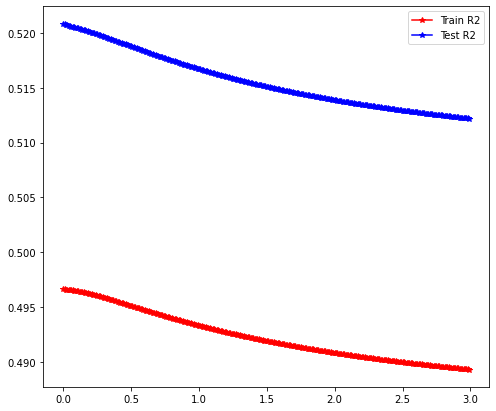

In [101]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_r, 'r*-')
plt.plot(Alpha, test_r, 'b*-')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [102]:
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test, Model):
    train_r = []
    test_r = []
    for i in Alpha:
        Model_R = Model(alpha=i)
        Model_R.fit(X_train, y_train)
        y_pred_tr = Model_R.predict(X_train)
        R2_train = r2_score(y_train, y_pred_tr)
        train_r.append(R2_train)
        y_pred_test = Model_R.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [103]:
Alpha = np.arange(0, 1, 0.01)

In [104]:
train_Enet, test_Enet = Manual_Tune(Alpha, X_train_1, X_test_1, y_train_1, y_test_1, ElasticNet)

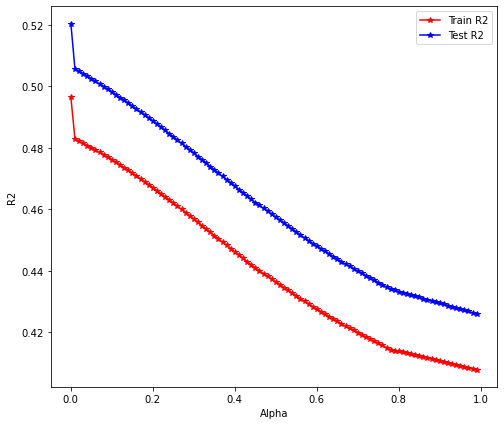

In [105]:
plt.figure(figsize=(8,7))
plt.plot(Alpha, train_Enet, 'r*-')
plt.plot(Alpha, test_Enet, 'b*-')
plt.ylabel('R2')
plt.xlabel('Alpha')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [106]:
### Cek Distribusi Error

In [107]:
df_error_T = X_train_1.copy()

In [108]:
df_error_T.head()

,month,date,day,WeekEnd,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
7539,6,14,1,0,-0.541042,-1.441699,1.0,-0.600677,-1.354893,-0.513370,...,-0.623728,-1.087556,-0.513158,-0.546156,-2.541545,-0.515713,-0.197689,-1.336300,-3.192239,-1.0
578,3,25,3,0,1.486464,-0.885559,1.0,1.621540,-0.305162,1.287266,...,1.650726,0.356569,1.325114,-0.497961,-0.024388,1.276870,-0.197223,-1.031077,-0.509135,-1.0
8056,4,12,0,0,1.942077,0.740918,1.0,1.821819,2.098370,2.267931,...,1.801995,2.237581,2.180444,1.312440,1.600292,2.296936,-0.129831,0.913063,0.576284,-1.0
11761,11,17,0,0,-0.541042,-0.260851,1.0,-0.600677,-0.505320,-0.511182,...,-0.623728,-0.617637,-0.511911,-0.458577,-0.193516,-0.511488,-0.191737,-0.221418,0.008661,-1.0
15531,12,29,5,1,-0.541042,-0.819415,1.0,-0.600677,-0.914748,-0.512641,...,-0.623728,-0.850413,-0.512742,-0.525606,-0.671888,-0.514305,-0.197018,-0.958512,-0.438739,-1.0


In [109]:
df_error_T['target'] = y_train_1

In [110]:
df_error_T.head()

,month,date,day,WeekEnd,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,target
7539,6,14,1,0,-0.541042,-1.441699,1.0,-0.600677,-1.354893,-0.513370,...,-1.087556,-0.513158,-0.546156,-2.541545,-0.515713,-0.197689,-1.336300,-3.192239,-1.0,8.9
578,3,25,3,0,1.486464,-0.885559,1.0,1.621540,-0.305162,1.287266,...,0.356569,1.325114,-0.497961,-0.024388,1.276870,-0.197223,-1.031077,-0.509135,-1.0,3.7
8056,4,12,0,0,1.942077,0.740918,1.0,1.821819,2.098370,2.267931,...,2.237581,2.180444,1.312440,1.600292,2.296936,-0.129831,0.913063,0.576284,-1.0,8.5
11761,11,17,0,0,-0.541042,-0.260851,1.0,-0.600677,-0.505320,-0.511182,...,-0.617637,-0.511911,-0.458577,-0.193516,-0.511488,-0.191737,-0.221418,0.008661,-1.0,9.5
15531,12,29,5,1,-0.541042,-0.819415,1.0,-0.600677,-0.914748,-0.512641,...,-0.850413,-0.512742,-0.525606,-0.671888,-0.514305,-0.197018,-0.958512,-0.438739,-1.0,4.5


In [111]:
np.max(test_Enet)

0.5204510451882848

In [112]:
np.max(test_r)

0.5208519447596331

In [113]:
Alpha [np.argmax(test_r)]

0.0

In [114]:
Model_R = Ridge(alpha=0.01)

In [115]:
Model_R.fit(X_train_1, y_train_1)

Ridge(alpha=0.01)

In [116]:
pred_train = Model_R.predict(X_train_1)

In [117]:
df_error_T['prediksi'] = pred_train

In [118]:
df_error_T['Error'] = abs(df_error_T['target'] - df_error_T['prediksi'])

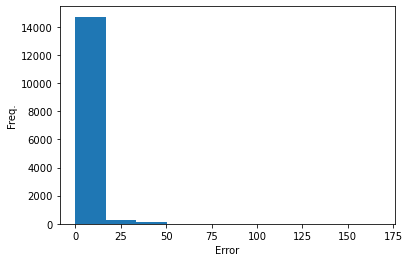

In [119]:
plt.hist(df_error_T['Error'])
plt.xlabel('Error')
plt.ylabel('Freq.')
plt.show()

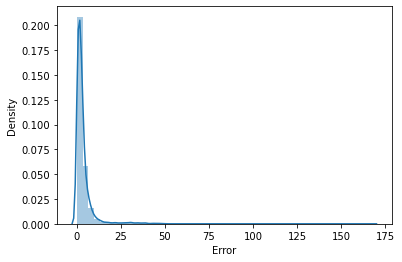

In [120]:
sns.distplot(df_error_T['Error'])
plt.show()

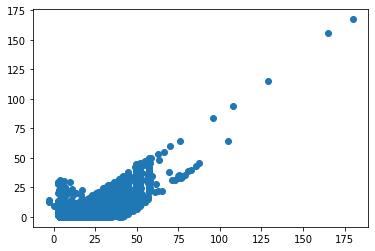

In [121]:
plt.scatter(df_error_T['target'], df_error_T['Error'])
plt.show()

In [122]:
df_error_T[df_error_T['Error'] > 75].sort_values('Error', ascending=False)

,month,date,day,WeekEnd,0,1,2,3,4,5,...,12,13,14,15,16,17,18,target,prediksi,Error
1335,1,16,2,0,-0.541042,-1.441699,1.0,-0.600677,-1.354893,-0.511911,...,-0.546156,-2.541545,-0.512896,-0.197689,-1.336300,-3.192239,-1.0,180.00,12.491328,167.508672
1483,8,7,4,0,-0.541042,-1.428820,1.0,-0.600677,-1.345933,-0.514831,...,-0.546149,-2.354648,-0.518532,-0.197689,-1.336140,-2.074657,-1.0,165.00,8.816779,156.183221
6630,5,16,4,0,-0.541042,-1.441699,1.0,-0.600677,-1.354893,-0.511182,...,-0.546156,-2.541545,-0.511488,-0.197689,-1.336300,-3.192239,-1.0,128.83,13.594170,115.235830
14142,12,12,4,0,-0.541042,0.647574,1.0,-0.600677,0.198599,-0.511182,...,-0.166273,0.327881,-0.511488,-0.141869,0.830928,0.530351,-1.0,108.00,14.225824,93.774176
12915,9,7,2,0,-0.541042,-1.441699,1.0,-0.600677,-1.354893,-0.513370,...,-0.546156,-2.541545,-0.515713,-0.197689,-1.336300,-3.192239,-1.0,96.00,12.137221,83.862779
